In [78]:
import os
# make path from current directory ./datasets/lifesets/
datapath = os.path.join("datasets","lifesat","")

import sklearn
%matplotlib inline

import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("DownLoading", filename)
    url  = DOWNLOAD_ROOT + "datasets/lifesat/"+ filename
    urllib.request.urlretrieve(url, datapath + filename)






DownLoading oecd_bli_2015.csv
DownLoading gdp_per_capita.csv


<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, Russia to United States
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GDP per capita     29 non-null     float64
 1   Life satisfaction  29 non-null     float64
dtypes: float64(2)
memory usage: 696.0+ bytes


<Axes: xlabel='GDP per capita', ylabel='Life satisfaction'>

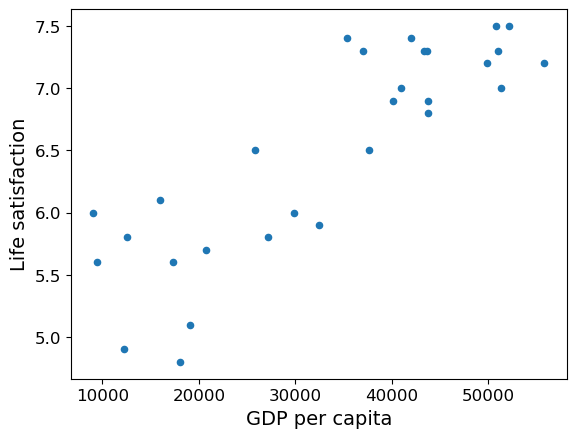

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

# data reading
oecd_bli =pd.read_csv(datapath +"oecd_bli_2015.csv",thousands=",")
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',encoding='latin1', na_values="n/a")
country_stats = prepare_country_stats(oecd_bli,gdp_per_capita)
country_stats.head(10)
country_stats.info()
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]
# dataset=np.column_stack((X,y))
# dataset
country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")


In [86]:

model=sklearn.linear_model.LinearRegression()
model.fit(X,y)

X_new =[22000]
print(model.predict([X_new]))


[[5.93359261]]


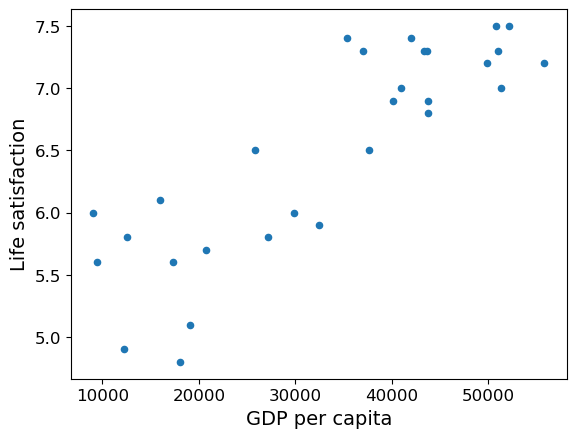

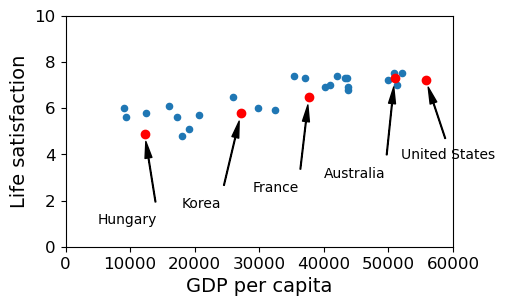

In [105]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns='Indicator', values='Value')


sample_data = country_stats[["GDP per capita", "Life satisfaction"]]
sample_data.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")

#make dataframe of gdp_per_capita

gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=",", delimiter='\t', 
                             encoding='Latin1', na_values='n/a')
gdp_per_capita.rename(columns={"2015" : "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace = True)
gdp_per_capita.head()

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)

full_country_stats[["GDP per capita", "Life satisfaction"]].loc["Japan"]


sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country,pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    plt.annotate(country,xy=(pos_data_x,pos_data_y),xytext=pos_text, arrowprops=dict(facecolor='black',width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
    plt.xlabel("GDP per capita")
plt.show()